# Titanic Survival
## Family vs. Wealth

In this project, I'll be looking at what would have improved your chances of survival on the Titanic. Specifically, I'll be looking at whether it would have been more beneficial to have family on board, or to have money in the bank.

My reason for looking at the data from this perspective, is that I find a case for both before looking into the data: Being wealthy might have improved your chances of being helped by the crew, but having family on board might have made you part of a group with a strong desire to survive for one another. But these are just musings without looking at the data!

First, we'll import a few libraries that will make our lives easier.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-muted')

Then we'll go ahead and import the data.

In [3]:
titanic_data = pd.read_csv('titanic-data.csv')

Now that we have the data imported, let's take a look at the first few rows to see whether we have the data that we need to answer the questions.

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great! It looks like we've got enough information to answer our question.

As we can see, there are 12 columns:

###### PassengerId
This is a unique identifier for each passenger.

###### Survived
This is a boolean with a value of 1 for "survived" and a 0 for "did not survive".

###### Pclass
This is a number from 1 to three, indicating whether the passenger was in first, second, or third class. We're interested in this as a determining factor in the wealth of the passenger.

###### Name
This is the full name of the passenger

###### Sex
If this isn't obvious, please speak to your parents

###### Age
The age of the passenger in years. If the age was lower than 1 year, it is represented as a fraction. If the age was a guess, it is followed by a .5

###### SibSp
This refers to the number of siblings or spouses on board. The data defines these relations as follows: Siblings are brother, sister, stepbrother, or stepsister. Spouses are husband or wife, with mistresses and fiancés excluded. This entry is particularly interesting from a family perspective.

###### Parch
This refers to the number of parents or children onboard with the dataset defining these relations as follows: Parents are mothers or fathers. Children are daughters, sons, stepdaughters, or stepsons. There are children with no parents listed, this is because they were travelling with a nanny. I'm a bit dissapointed that all of this information is bundled together, particularly for the comparison that we're hoping to make.

Before we go on, let's get an overall look at the data

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It looks like there's quite a bit of data missing for Age, but we're not going to worry about cleaning that out, as it's not part of our hypothesis. We will, however, add some fields as a later stage to make our life easier.

# Working with the Data

It's time to start working with the data. To start with, let's create a few simple pie charts to get a high-level view of where we're going. Before we start, we'll create a helper function to speed things up for the next few pie charts, while also making our code more maintainable.

In [6]:
def plot_survival_pie_by_len(survived,deceased, label='Survival'):
    survival_series = pd.Series([len(survived), len(deceased)],index=['Survived', 'Deceased'])
    survival_series.plot.pie(label=label, figsize=(5,5), colormap='coolwarm', autopct='%1.1f%%')

## Helpful Subsets

I think that subsets for survived and deceased will help us going forward, so let's create them:

In [7]:
survived = titanic_data[titanic_data.Survived == 1]
deceased = titanic_data[titanic_data.Survived == 0]

# Survival Rates

## Total Survival

Our first pie chart shows the number of passengers who survived, vs those who didn't.

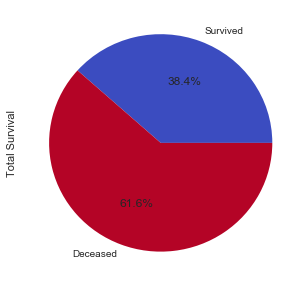

In [8]:
plot_survival_pie_by_len(survived,deceased, 'Total Survival')

## Survival by Passenger Class

### TODO writeup

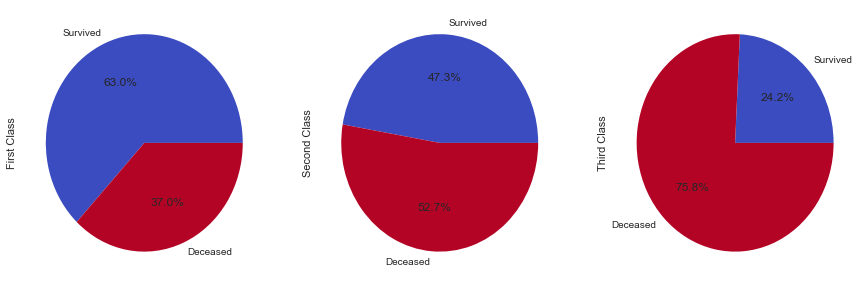

In [42]:
first_class_survived = survived[survived.Pclass == 1]
first_class_deceased = deceased[deceased.Pclass == 1]

second_class_survived = survived[survived.Pclass == 2]
second_class_deceased = deceased[deceased.Pclass == 2]

third_class_survived = survived[survived.Pclass == 3]
third_class_deceased = deceased[deceased.Pclass == 3]

first_survival_series = pd.Series([len(first_class_survived), len(first_class_deceased)],index=['Survived', 'Deceased'])
second_survival_series = pd.Series([len(second_class_survived), len(second_class_deceased)],index=['Survived', 'Deceased'])
third_survival_series = pd.Series([len(third_class_survived), len(third_class_deceased)],index=['Survived', 'Deceased'])


fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

first_survival_series.plot.pie(ax=ax0, label="First Class",figsize=(15,5), colormap='coolwarm', autopct='%1.1f%%')
second_survival_series.plot.pie(ax=ax1, label="Second Class", figsize=(15,5),colormap='coolwarm', autopct='%1.1f%%')
third_survival_series.plot.pie(ax=ax2, label="Third Class", figsize=(15,5),colormap='coolwarm', autopct='%1.1f%%')

## Survival By Family Status

In order to easily tell whether a passenger has family onboard, let's go ahead and create a boolean for whether or not they do. This boolean will be the result of whether the passenger has an entry above zero in either the Parch or the SibSp column. We'll create the column then take a look at what the new dataframe looks like.

In [12]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

has_family = has_parch | has_sibsp

titanic_data['has_family'] = has_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


Now we'll update our survived and deceased subsets so that they have the has_family column

In [13]:
survived = titanic_data[titanic_data.Survived == 1]
deceased = titanic_data[titanic_data.Survived == 0]

### Survival of those with family

Now we're ready to start with a high level intuitive look at how having family onboard affects your chance of survival

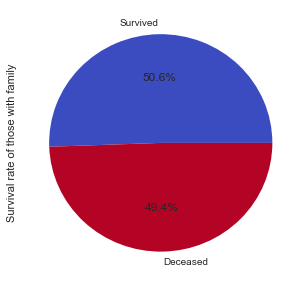

In [14]:
has_family_survived = survived[survived.has_family]
has_family_not_survived = deceased[deceased.has_family]

plot_survival_pie_by_len(has_family_survived,has_family_not_survived,'Survival rate of those with family')

### Survival of those without family

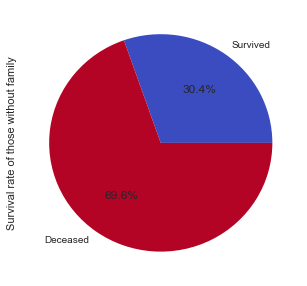

In [15]:
no_family_survived = survived[survived.has_family == False]
no_family_deceased = deceased[deceased.has_family == False]

plot_survival_pie_by_len(no_family_survived,no_family_deceased,'Survival rate of those without family')

In [16]:
mean_survived = titanic_data.mean()['Survived']
std_survived = titanic_data.std(ddof=0)['Survived']

print mean_survived
print std_survived

0.383838383838
0.486319317867


In [17]:
def standardize_mean(mean):
    return (mean - mean_survived) / std_survived

Pclass
1    0.505411
2    0.182982
3   -0.290911
Name: Survived, dtype: float64


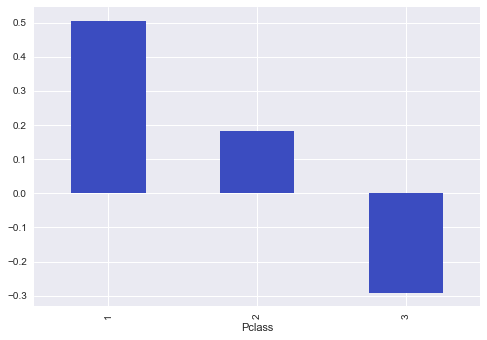

In [18]:
by_classes = titanic_data.groupby('Pclass').mean()['Survived'].apply(standardize_mean)
print by_classes

by_classes.plot.bar(colormap='coolwarm')

has_family
False   -0.165118
True     0.250476
Name: Survived, dtype: float64


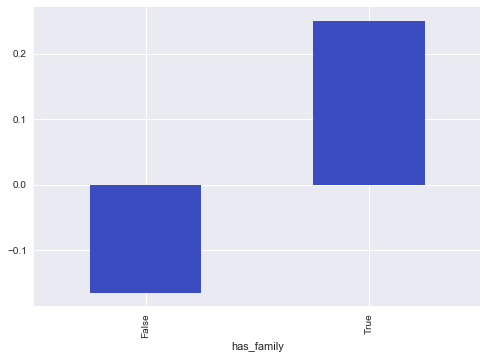

In [19]:
by_family = titanic_data.groupby('has_family').mean()['Survived'].apply(standardize_mean)

print by_family

by_family.plot.bar(colormap='coolwarm')

In [20]:
grouped = titanic_data.groupby('Survived').mean()
print grouped['Fare']

print grouped['has_family']

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64
Survived
0    0.318761
1    0.523392
Name: has_family, dtype: float64


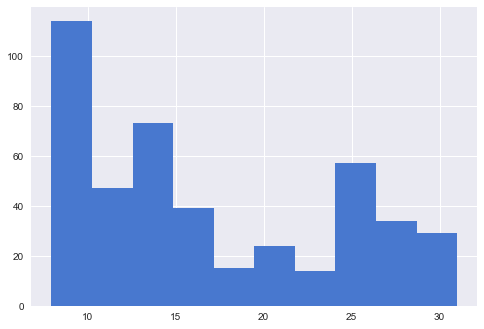

In [21]:
#titanic_data.boxplot(column="Fare")
titanic_fare_25 = titanic_data["Fare"].quantile(0.25)
titanic_fare_75 = titanic_data["Fare"].quantile(0.75)
titanic_fare_no_outliers = titanic_data[titanic_data.Fare >= titanic_fare_25]
titanic_fare_no_outliers = titanic_fare_no_outliers[titanic_fare_no_outliers.Fare <= titanic_fare_75]
titanic_fare_no_outliers['Fare'].hist(bins=10)

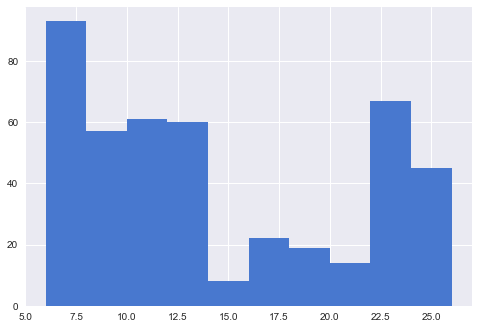

In [22]:
fare_num_bins = 20
fare_bin_size = (titanic_fare_75 - titanic_fare_25) / fare_num_bins

def reduce_fares(fare):
    return int(fare/fare_bin_size)

titanic_fare_binned = titanic_fare_no_outliers.copy()
titanic_fare_binned['Fare'] = titanic_fare_binned['Fare'].apply(reduce_fares)

titanic_fare_binned['Fare'].hist()


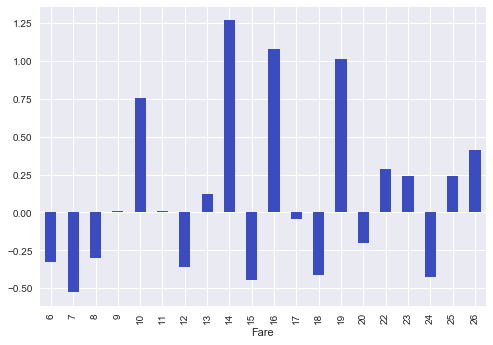

In [23]:
titanic_fare_binned_grouped = titanic_fare_binned.groupby('Fare')
titanic_fare_binned_standardized = titanic_fare_binned_grouped['Survived'].mean().apply(standardize_mean)
titanic_fare_binned_standardized.plot.bar(colormap='coolwarm')

Correlation: 
0.198864450122


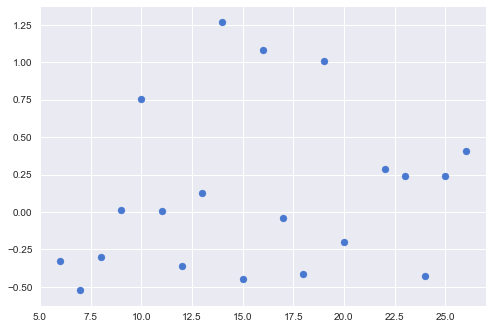

In [24]:
fare_correlation = pd.DataFrame({'fare': titanic_fare_binned_standardized.index.values,
                                  'survived': titanic_fare_binned_standardized.values})

print 'Correlation: '
print fare_correlation.corr(method='pearson').loc['fare','survived']

plt.scatter(titanic_fare_binned_standardized.index.values, titanic_fare_binned_standardized.values)

## Family Data by Number of Family

In [25]:
parch_col = titanic_data['Parch']
sibsp_col = titanic_data['SibSp']

has_parch = parch_col > 0
has_sibsp = sibsp_col > 0

num_family = parch_col + sibsp_col

titanic_data['num_family'] = num_family

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family,num_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0


In [26]:
print titanic_data['num_family'].quantile(0.25)
print titanic_data['num_family'].quantile(0.90)

0.0
3.0


num_family
0   -0.165118
1    0.347419
2    0.400134
3    0.699745
Name: Survived, dtype: float64


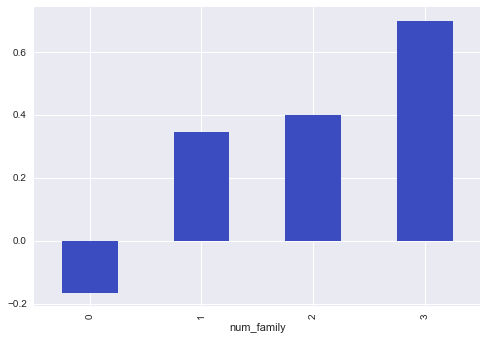

In [27]:
titanic_family = titanic_data.groupby('num_family')
titanic_family_std = titanic_family['Survived'].mean().apply(standardize_mean)
titanic_family_interquart = titanic_family_std.loc[0:3]
print titanic_family_interquart
titanic_family_interquart.plot.bar(colormap='coolwarm')

Correlation: 
0.951900829371


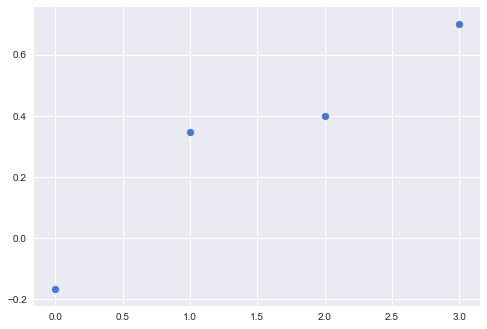

In [28]:
family_correlation = pd.DataFrame({'num_family': titanic_family_interquart.index.values,
                                  'survived': titanic_family_interquart.values})

print 'Correlation: '
print family_correlation.corr(method='pearson').loc['num_family', 'survived']

plt.scatter(titanic_family_interquart.index.values, titanic_family_interquart.values)

# Conclusion

We've taken a look at family and wealth as determining factors in survival on the Titanic. With family being relatively objective, we needed an operational definition for wealth. We looked at passenger class, as well as fare as operational definitions for wealth.

While the passenger class showed a promising link between wealth and survival, there weren't enough bins to reliably draw up a correlation in the form of Pearson's r. We then looked at fare as an operational definition for wealth. There we had almost too much information, so we removed outliers and binned the results. This helped us discover a very weak correlation of 0.199.

We then moved onto family. In order to get data more granular than simply had family or didn't, we looked at the number of family members that passengers had onboard and removed the upper outliers. We couldn't remove the lower outliers, as these were of the value zero and constituted a large portion of the population. We then discovered a strong corrlation of 0.952 between the number of family members on board and the rate of survival. Passengers with 3 family members on board had a survival rate 0.7 standard deviations above the norm.